In [65]:
# !pip install pandas
# !pip install openpyxl
# !pip install seaborn

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", "use_inf_as_na")

%matplotlib inline

## Data Preprocessing
Reading, processing and summarizing data

In [67]:
# Reading file and displaying first rows to see the structure of data - USD/PLN
usd_pln = pd.read_excel('files/USD_PLN.xlsx', sheet_name = 0)
usd_pln.head()

,Data,Ostatnio,Otwarcie,Max.,Min.,Wol.,Zmiana%
0,2024-02-29,3.9910,3.9856,4.0025,3.9750,NaN,0.0022
1,2024-02-28,3.9822,3.9702,3.9944,3.9678,NaN,0.0039
2,2024-02-27,3.9669,3.9717,3.9850,3.9594,NaN,-0.0004
3,2024-02-26,3.9686,3.9839,3.9918,3.9620,NaN,-0.0018
4,2024-02-23,3.9756,3.9955,4.0101,3.9755,NaN,-0.0047


In [68]:
# Viewing columns and their datatypes
usd_pln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3427 entries, 0 to 3426
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      3427 non-null   datetime64[ns]
 1   Ostatnio  3427 non-null   float64       
 2   Otwarcie  3427 non-null   float64       
 3   Max.      3427 non-null   float64       
 4   Min.      3427 non-null   float64       
 5   Wol.      0 non-null      float64       
 6   Zmiana%   3427 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 187.5 KB


In [69]:
# Reading file and displaying first rows to see the structure of data - unemployment
unemployment = pd.read_excel('files/general_unemployment.xlsx', sheet_name = 1)
unemployment.head()

,Kod,Nazwa,Miesiące,Płeć,Rok,Wartosc,Jednostka miary,Atrybut
0,0,POLSKA,styczeń,ogółem,2011,2104986,osoba,
1,0,POLSKA,styczeń,ogółem,2012,2121518,osoba,
2,0,POLSKA,styczeń,ogółem,2013,2295744,osoba,
3,0,POLSKA,styczeń,ogółem,2014,2260662,osoba,
4,0,POLSKA,styczeń,ogółem,2015,1918599,osoba,


In [70]:
# Viewing columns and their datatypes
unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Kod              504 non-null    int64 
 1   Nazwa            504 non-null    object
 2   Miesiące         504 non-null    object
 3   Płeć             504 non-null    object
 4   Rok              504 non-null    int64 
 5   Wartosc          504 non-null    object
 6   Jednostka miary  504 non-null    object
 7   Atrybut          504 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.6+ KB


In [71]:
# Cleaning up data - drop  irrelevant columns
usd_pln.drop(['Otwarcie', 'Max.', 'Min.', 'Wol.', 'Zmiana%'], axis = 1, inplace = True)
usd_pln.rename(columns={'Ostatnio': 'Kurs'}, inplace=True)
usd_pln.head()

,Data,Kurs
0,2024-02-29,3.9910
1,2024-02-28,3.9822
2,2024-02-27,3.9669
3,2024-02-26,3.9686
4,2024-02-23,3.9756


In [72]:
# Calculate mean value of USD/PLN for each month
usd_pln['year'] = usd_pln['Data'].dt.year
usd_pln['month'] = usd_pln['Data'].dt.month
monthly_mean = usd_pln.groupby(['year', 'month'])['Kurs'].mean()

# Merge monthly mean back into the original data
usd_pln = usd_pln.drop(columns=['Data', 'Kurs'])
usd_pln = usd_pln.drop_duplicates(subset=['year', 'month'])
usd_pln = usd_pln.merge(monthly_mean, on=['year', 'month'])
usd_pln['date'] = pd.to_datetime(usd_pln[['year', 'month']].assign(day=1))
usd_pln.head()

,year,month,Kurs,date
0,2024,2,4.004824,2024-02-01
1,2024,1,3.995843,2024-01-01
2,2023,12,3.961529,2023-12-01
3,2023,11,4.062991,2023-11-01
4,2023,10,4.264895,2023-10-01


In [73]:
# Cleaning up data - drop null data and irrelevant columns
unemployment = unemployment[unemployment['Atrybut'] != 'n']
unemployment.drop(['Kod', 'Nazwa', 'Jednostka miary', 'Atrybut'], axis = 1, inplace = True)
unemployment.rename(columns={'Wartosc': 'Osoby'}, inplace=True)
unemployment.head()

,Miesiące,Płeć,Rok,Osoby
0,styczeń,ogółem,2011,2104986
1,styczeń,ogółem,2012,2121518
2,styczeń,ogółem,2013,2295744
3,styczeń,ogółem,2014,2260662
4,styczeń,ogółem,2015,1918599


In [74]:
# Preparing month map to create date column
month_mapping = {
    'styczeń' : 1,
    'luty' : 2,
    'marzec' : 3,
    'kwiecień' : 4,
    'maj' : 5,
    'czerwiec' : 6,
    'lipiec' : 7,
    'sierpień' : 8,
    'wrzesień' : 9,
    'październik' : 10,
    'listopad' : 11,
    'grudzień' : 12
}

In [75]:
# Applying month map and creating date column
unemployment['Month'] = unemployment['Miesiące'].map(month_mapping)
unemployment.rename(columns = {'Rok' : 'Year'}, inplace = True)
unemployment['Data'] = pd.to_datetime(unemployment[['Year', 'Month']].assign(DAY=1))

# Changing type of number of people to int
unemployment['Osoby'] = unemployment['Osoby'].astype(int)
unemployment.head()

,Miesiące,Płeć,Year,Osoby,Month,Data
0,styczeń,ogółem,2011,2104986,1,2011-01-01
1,styczeń,ogółem,2012,2121518,1,2012-01-01
2,styczeń,ogółem,2013,2295744,1,2013-01-01
3,styczeń,ogółem,2014,2260662,1,2014-01-01
4,styczeń,ogółem,2015,1918599,1,2015-01-01


## Exploratory Data Analysis (EDA)

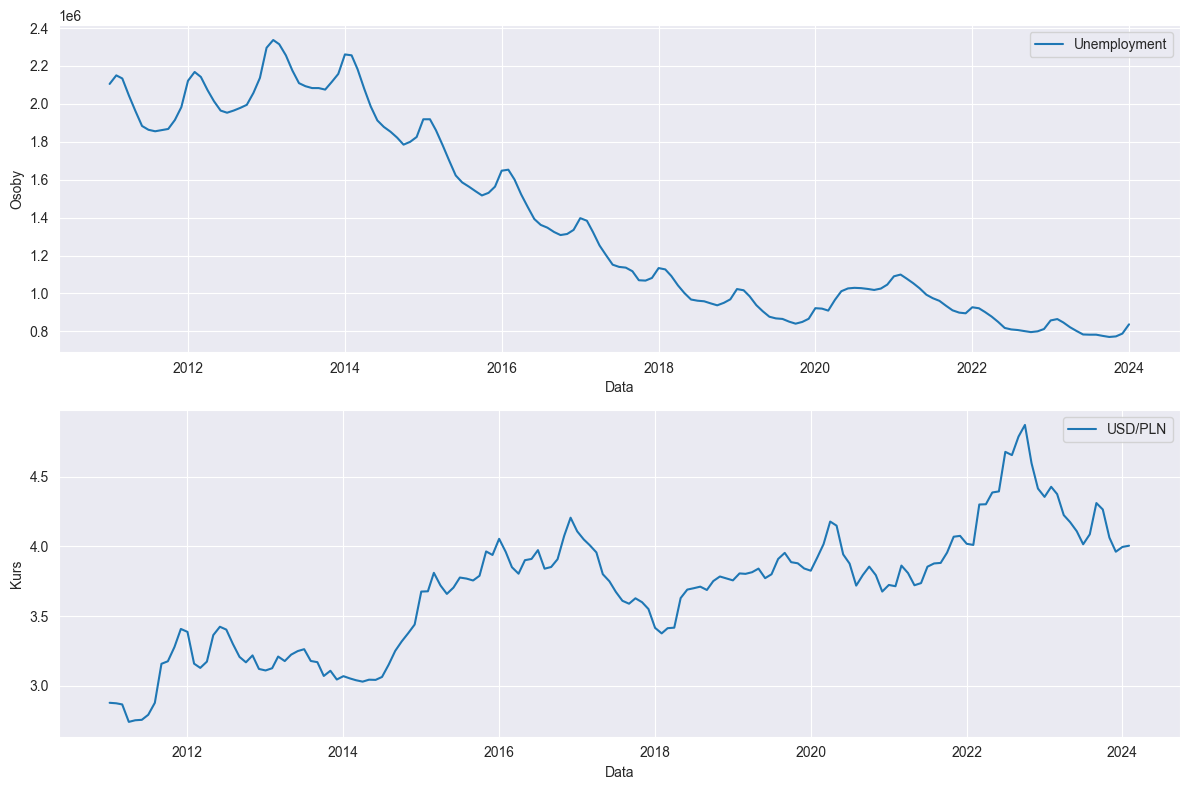

In [76]:
fig = plt.figure(figsize = [12,8])

plt.subplot(2, 1, 1)
sns.lineplot(
    x="Data",
    y="Osoby",
    data=unemployment[unemployment['Płeć'] == "ogółem"],
    label="Unemployment"
)

plt.subplot(2, 1, 2)
sns.lineplot(
    x="date",
    y="Kurs",
    data=usd_pln,
    label="USD/PLN"
)
plt.xlabel("Data")
plt.tight_layout()

plt.legend()

plt.show()

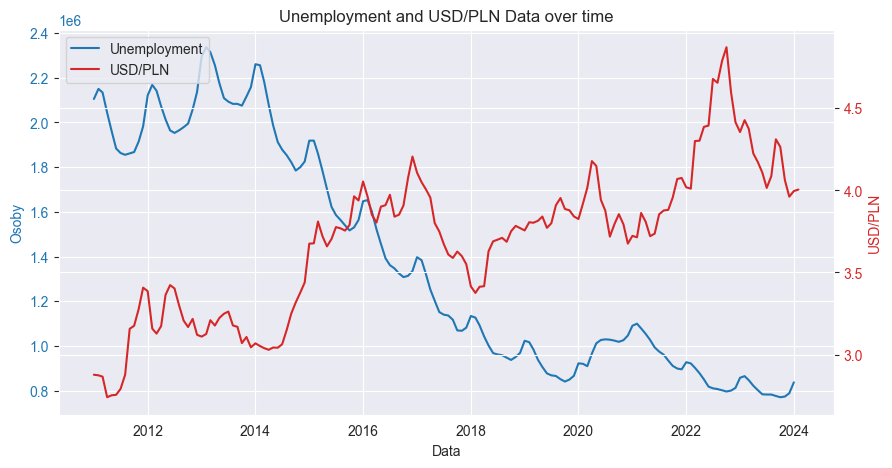

In [77]:
plt.figure(figsize=(10, 5))

# Unemployment data
ax1 = sns.lineplot(
    x="Data",
    y="Osoby",
    data=unemployment[unemployment['Płeć'] == "ogółem"],
    label="Unemployment"
)
ax1.set_xlabel("Data")
ax1.set_ylabel("Osoby", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Currency data
ax2 = ax1.twinx()
sns.lineplot(
    x="date",
    y="Kurs",
    data=usd_pln,
    ax=ax2,
    color='tab:red',
    label="USD/PLN"
)
ax2.set_ylabel("USD/PLN", color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Combining legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Removing duplicate legend
ax2.get_legend().remove()

plt.title("Unemployment and USD/PLN Data over time")
plt.show()